In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Task 1


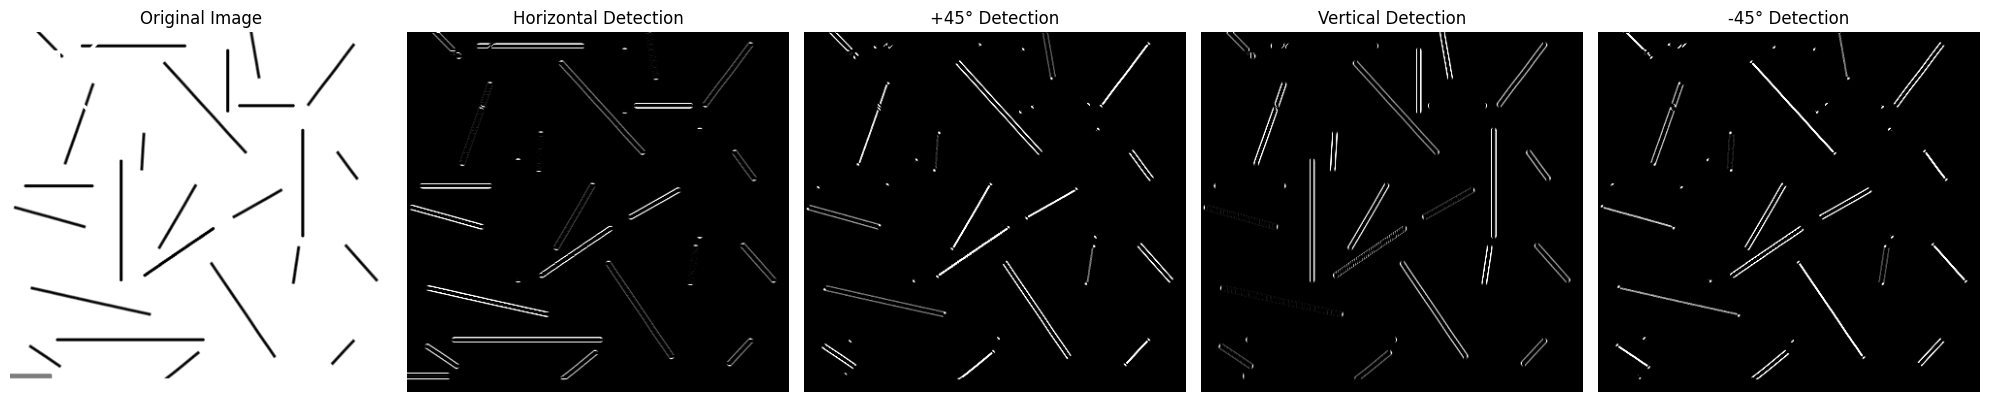

In [ ]:
image = cv2.imread("lines.png", cv2.IMREAD_GRAYSCALE)

cv2.line(image, (10, 20), (90, 20), 255, 2)  # Horizontal line
cv2.line(image, (50, 10), (50, 90), 255, 2)  # Vertical line
cv2.line(image, (10, 10), (90, 90), 255, 2)  # Diagonal line (+45°)
cv2.line(image, (90, 10), (10, 90), 255, 2)  # Diagonal line (-45°)

horizontal_mask = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])

diagonal_45_mask = np.array([[2, -1, -1], [-1, 2, -1], [-1, -1, 2]])

vertical_mask = np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]])

diagonal_minus_45_mask = np.array([[-1, -1, 2], [-1, 2, -1], [2, -1, -1]])

horizontal_result = cv2.filter2D(image, -1, horizontal_mask)
diagonal_45_result = cv2.filter2D(image, -1, diagonal_45_mask)
vertical_result = cv2.filter2D(image, -1, vertical_mask)
diagonal_minus_45_result = cv2.filter2D(image, -1, diagonal_minus_45_mask)


fig, axes = plt.subplots(1, 5, figsize=(20, 10))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")

axes[1].imshow(horizontal_result, cmap="gray")
axes[1].set_title("Horizontal Detection")

axes[2].imshow(diagonal_45_result, cmap="gray")
axes[2].set_title("+45° Detection")

axes[3].imshow(vertical_result, cmap="gray")
axes[3].set_title("Vertical Detection")

axes[4].imshow(diagonal_minus_45_result, cmap="gray")
axes[4].set_title("-45° Detection")

for ax in axes:
    ax.axis("off")
plt.tight_layout()
plt.show()

# Task 2


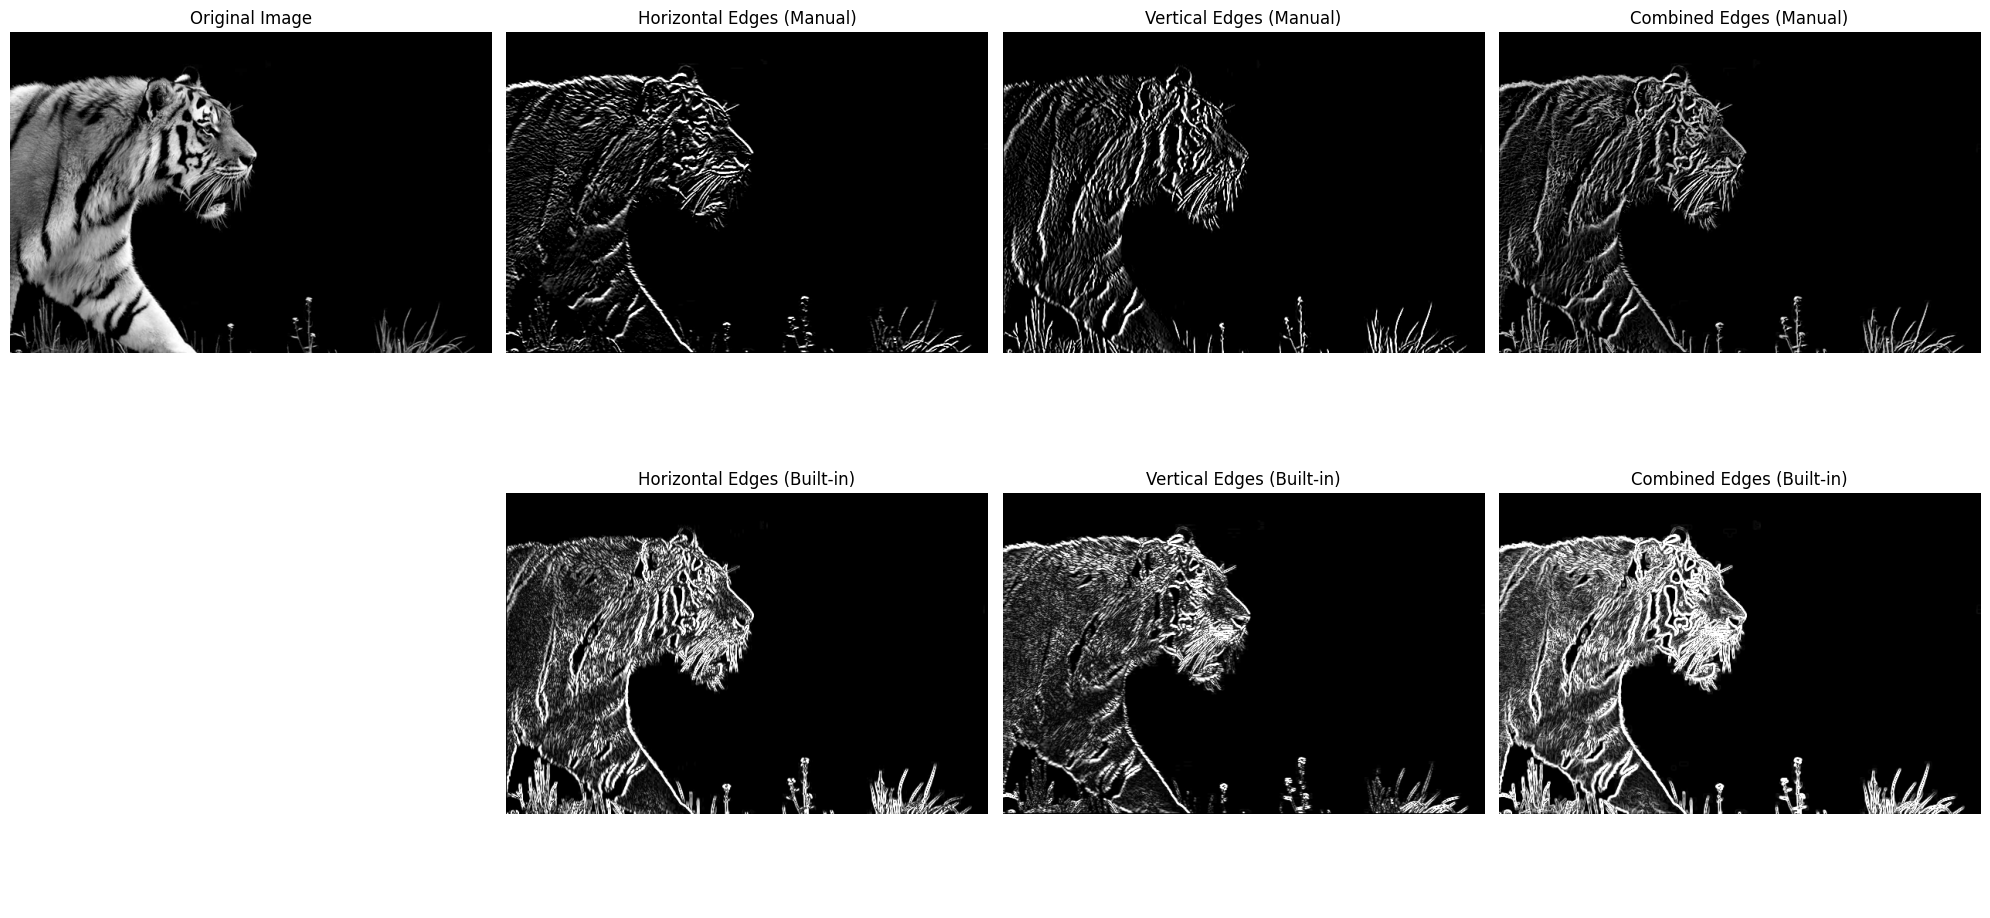

In [ ]:
image = "tiger.png"
user_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

sobel_horizontal = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

sobel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

horizontal_edges_manual = cv2.filter2D(user_image, -1, sobel_horizontal)
vertical_edges_manual = cv2.filter2D(user_image, -1, sobel_vertical)

horizontal_edges_manual_float = horizontal_edges_manual.astype(np.float32)
vertical_edges_manual_float = vertical_edges_manual.astype(np.float32)

combined_edges_manual = cv2.magnitude(
    horizontal_edges_manual_float, vertical_edges_manual_float
)

horizontal_edges_builtin = cv2.Sobel(user_image, cv2.CV_64F, 1, 0, ksize=3)
vertical_edges_builtin = cv2.Sobel(user_image, cv2.CV_64F, 0, 1, ksize=3)

horizontal_edges_builtin_abs = cv2.convertScaleAbs(horizontal_edges_builtin)
vertical_edges_builtin_abs = cv2.convertScaleAbs(vertical_edges_builtin)
combined_edges_builtin = cv2.magnitude(horizontal_edges_builtin, vertical_edges_builtin)
combined_edges_builtin_abs = cv2.convertScaleAbs(combined_edges_builtin)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes[0, 0].imshow(user_image, cmap="gray")
axes[0, 0].set_title("Original Image")

axes[0, 1].imshow(horizontal_edges_manual, cmap="gray")
axes[0, 1].set_title("Horizontal Edges (Manual)")
axes[0, 2].imshow(vertical_edges_manual, cmap="gray")
axes[0, 2].set_title("Vertical Edges (Manual)")
axes[0, 3].imshow(combined_edges_manual, cmap="gray")
axes[0, 3].set_title("Combined Edges (Manual)")

axes[1, 1].imshow(horizontal_edges_builtin_abs, cmap="gray")
axes[1, 1].set_title("Horizontal Edges (Built-in)")
axes[1, 2].imshow(vertical_edges_builtin_abs, cmap="gray")
axes[1, 2].set_title("Vertical Edges (Built-in)")
axes[1, 3].imshow(combined_edges_builtin_abs, cmap="gray")
axes[1, 3].set_title("Combined Edges (Built-in)")

for ax in axes.flatten():
    ax.axis("off")

plt.tight_layout()
plt.show()

# Task 3


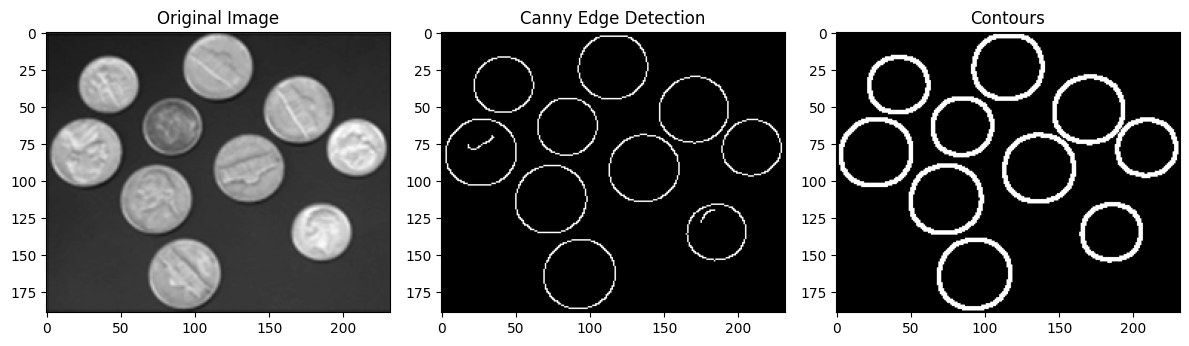

In [ ]:
image = cv2.imread("coin.png", cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

edges = cv2.Canny(blurred_image, threshold1=100, threshold2=200)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output_image = np.zeros_like(image)
cv2.drawContours(output_image, contours, -1, (255, 255, 255), 2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")

plt.subplot(1, 3, 3)
plt.imshow(output_image, cmap="gray")
plt.title("Contours")

plt.tight_layout()
plt.show()